# My first data science project
##### Anna Warno

## Introduction
## The aim of this analysis is an attempt to solve the [Porto Seguro's Safe Driver Prediction competition](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction). A following simple pipeline was implemented:

1. The data was loaded and explored.
2. Missing values were dealt with.
3. Data was transformed with various transformations (quadratic, exponential etc.).
4. Logistic regression with L1 penalty was used for variable selection.
5. Logistic regression classifier was built and tested.

## Firstly, all the required modules were imported.

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

## The data set was loaded from the csv file. 'id' colum was dropped as it was irrelevenat for the analysis.

In [52]:
DATA = pd.read_csv("train.csv")
DATA = DATA.drop('id', axis = 1)
DATA.shape

(595212, 58)

## The original dataset consists of 595212 observations, 57 exogenous variable and 1 target variable. The description of the dataset can be found at the [competition's website.](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data)

## The first part of the data exploration process was to determine whether the dataset is balanced and compute the correlation matrix.

In [53]:
DATA['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

## The dataset is not balanced.

In [54]:
DATA.corr()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,-0.008237,...,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,0.162800,...,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,0.110076,...,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,0.111306,...,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,-0.011442,...,-0.002001,-0.000814,0.000283,0.001565,0.002735,0.002295,0.000773,0.000916,-0.001966,0.001244
ps_ind_05_cat,0.029165,0.014823,-0.014860,0.053250,0.013053,1.000000,0.009619,-0.010382,0.004881,-0.005069,...,-0.001525,0.000975,0.001549,0.002171,0.001548,-0.000368,0.000153,0.000032,0.000276,0.000279
ps_ind_06_bin,-0.034017,-0.277458,-0.125653,-0.045158,-0.297737,0.009619,1.000000,-0.474009,-0.356838,-0.384345,...,0.000822,0.001347,-0.001301,0.000304,0.002088,-0.000381,-0.000001,-0.000759,0.002791,0.000203
ps_ind_07_bin,0.034218,0.005700,0.016398,-0.060368,0.304949,-0.010382,-0.474009,1.000000,-0.260438,-0.280513,...,-0.000448,-0.001044,0.000541,0.001666,0.000575,0.001220,-0.000517,0.000181,-0.001361,-0.000961
ps_ind_08_bin,0.013147,0.188583,0.030945,0.014037,0.044978,0.004881,-0.356838,-0.260438,1.000000,-0.211173,...,-0.000632,-0.001241,-0.000432,-0.001959,-0.002782,-0.002048,-0.000579,-0.000068,-0.000919,0.000995
ps_ind_09_bin,-0.008237,0.162800,0.110076,0.111306,-0.011442,-0.005069,-0.384345,-0.280513,-0.211173,1.000000,...,0.000072,0.000664,0.001439,-0.000389,-0.000621,0.001059,0.001135,0.000815,-0.001103,-0.000123


## The correlations are abnormally low. 

##  We calculate the number of missing data for each column.

In [55]:
na = [(x, DATA.loc[DATA[x] == -1].shape[0]) for x in DATA.columns]
na

[('target', 0),
 ('ps_ind_01', 0),
 ('ps_ind_02_cat', 216),
 ('ps_ind_03', 0),
 ('ps_ind_04_cat', 83),
 ('ps_ind_05_cat', 5809),
 ('ps_ind_06_bin', 0),
 ('ps_ind_07_bin', 0),
 ('ps_ind_08_bin', 0),
 ('ps_ind_09_bin', 0),
 ('ps_ind_10_bin', 0),
 ('ps_ind_11_bin', 0),
 ('ps_ind_12_bin', 0),
 ('ps_ind_13_bin', 0),
 ('ps_ind_14', 0),
 ('ps_ind_15', 0),
 ('ps_ind_16_bin', 0),
 ('ps_ind_17_bin', 0),
 ('ps_ind_18_bin', 0),
 ('ps_reg_01', 0),
 ('ps_reg_02', 0),
 ('ps_reg_03', 107772),
 ('ps_car_01_cat', 107),
 ('ps_car_02_cat', 5),
 ('ps_car_03_cat', 411231),
 ('ps_car_04_cat', 0),
 ('ps_car_05_cat', 266551),
 ('ps_car_06_cat', 0),
 ('ps_car_07_cat', 11489),
 ('ps_car_08_cat', 0),
 ('ps_car_09_cat', 569),
 ('ps_car_10_cat', 0),
 ('ps_car_11_cat', 0),
 ('ps_car_11', 5),
 ('ps_car_12', 1),
 ('ps_car_13', 0),
 ('ps_car_14', 42620),
 ('ps_car_15', 0),
 ('ps_calc_01', 0),
 ('ps_calc_02', 0),
 ('ps_calc_03', 0),
 ('ps_calc_04', 0),
 ('ps_calc_05', 0),
 ('ps_calc_06', 0),
 ('ps_calc_07', 0),
 ('ps_ca

## There is trouble with missing information. Two solutions are proposed:

## * If the fraction of missing data is not large, NaNs are replaced with mean values.
## * If the fraction of missing data is overwhelming, we replace the variable with dummy variable indicating whether the value of the given feature is not missing.

In [56]:
for column in DATA.columns:
    DATA[column] = DATA[column].replace(to_replace = -1, value = float('NaN'))

In [57]:
na = dict([(column, DATA[column].isnull().sum()) for column in DATA.columns])

In [58]:
for column in DATA.columns:
    if na[column] < 100000:
        DATA[column] = DATA[column].fillna(DATA[column].mean())

In [59]:
for column in DATA.columns:
    if na[column] >= 100000:
        DATA[column] = DATA[column].isnull().apply(int)

# Searching for dependencies of individual variables and the target variable.


In [60]:
def plotsy(x):
    my_tab = pd.crosstab(index=x,
                                  columns=DATA["target"])
    
    my_tab = my_tab[my_tab[0]+my_tab[1]>=1000]
    if my_tab.shape[0]:
        plt.plot(my_tab.index,my_tab[1]/(my_tab[0]))
        print (ind)
        plt.show()
 

## For every variable we plot a chart indicating fraction of the target variable for different values (only for values that show up more than 1000 times) 

ps_ind_01


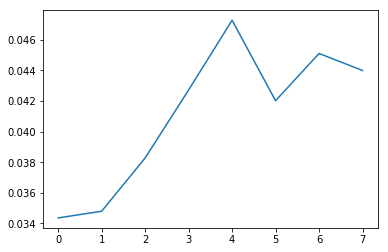

ps_ind_02_cat


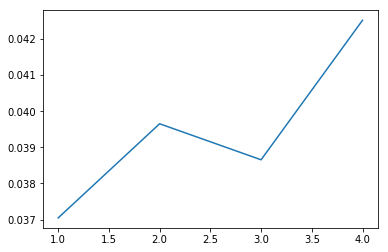

ps_ind_03


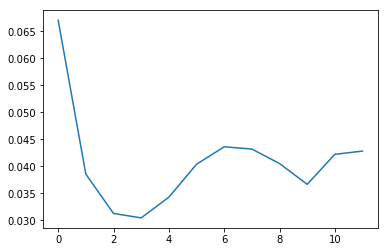

ps_ind_04_cat


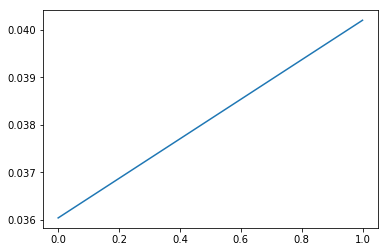

ps_ind_05_cat


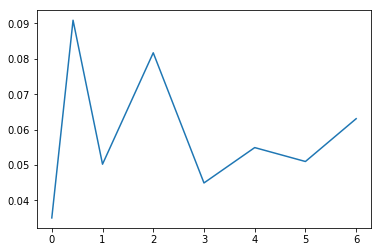

ps_ind_06_bin


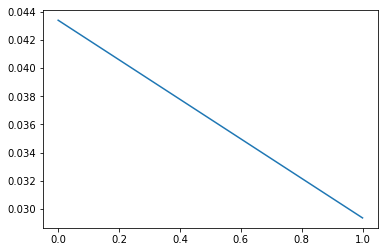

ps_ind_07_bin


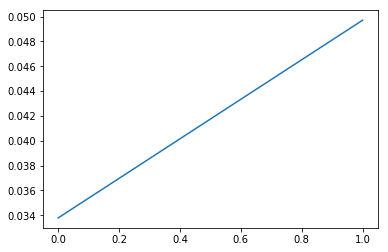

ps_ind_08_bin


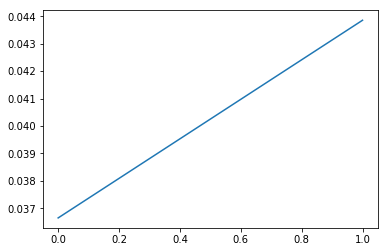

ps_ind_09_bin


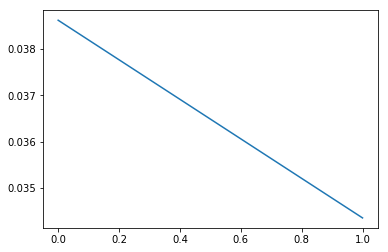

ps_ind_10_bin


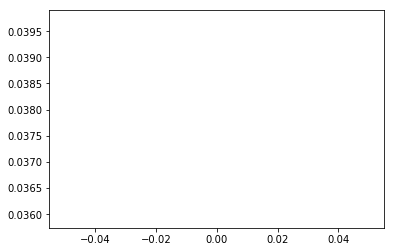

ps_ind_11_bin


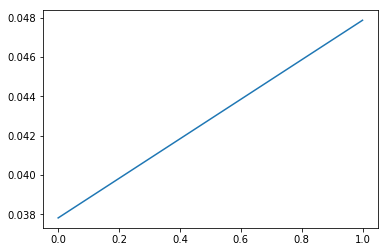

ps_ind_12_bin


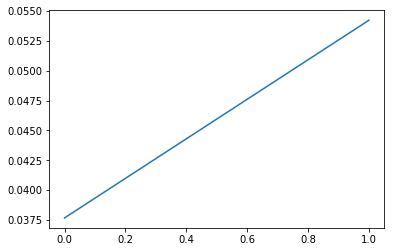

ps_ind_13_bin


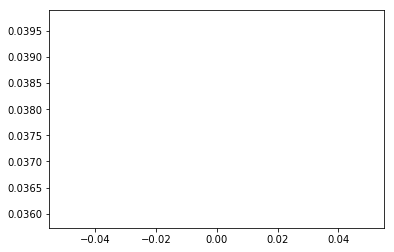

ps_ind_14


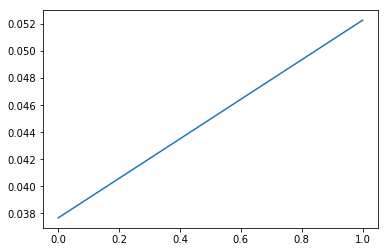

ps_ind_15


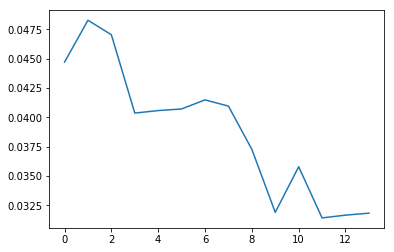

ps_ind_16_bin


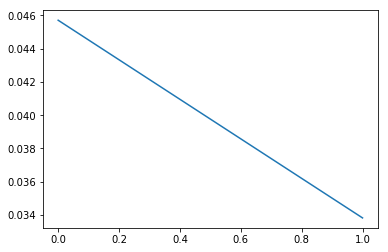

ps_ind_17_bin


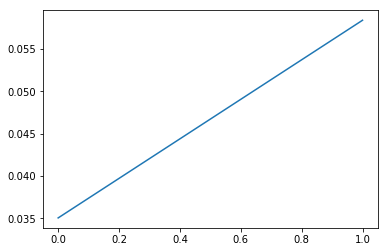

ps_ind_18_bin


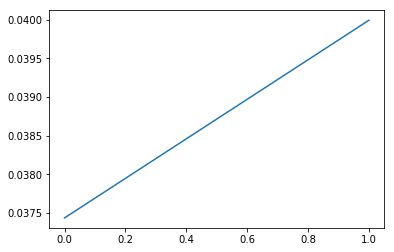

ps_reg_01


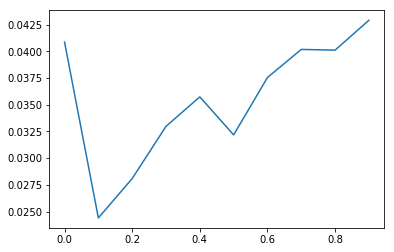

ps_reg_02


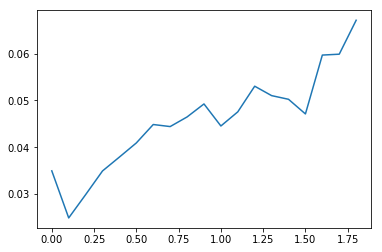

ps_reg_03


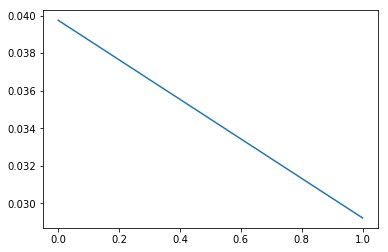

ps_car_01_cat


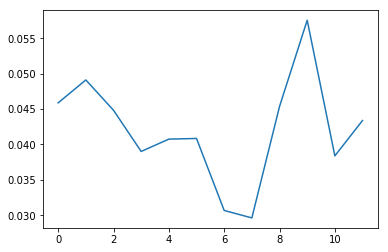

ps_car_02_cat


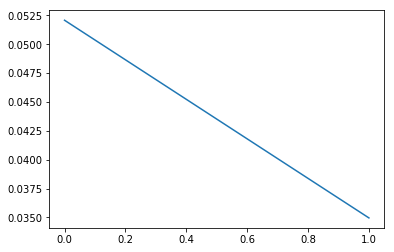

ps_car_03_cat


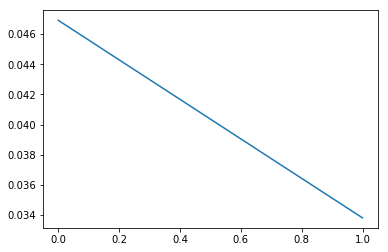

ps_car_04_cat


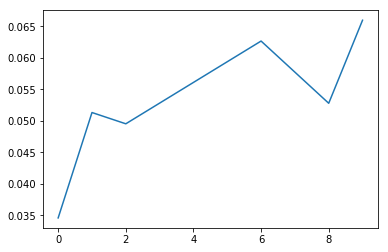

ps_car_05_cat


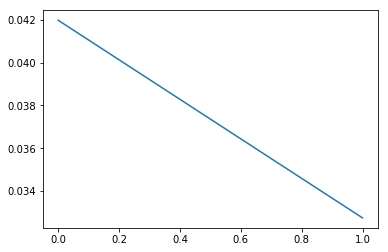

ps_car_06_cat


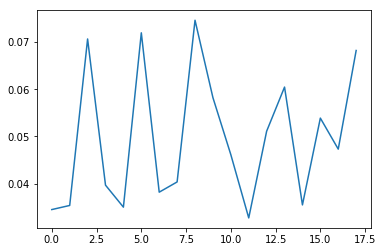

ps_car_07_cat


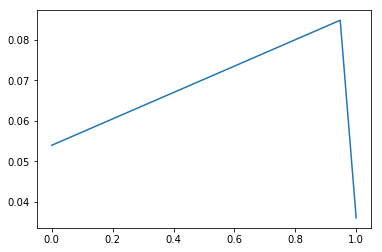

ps_car_08_cat


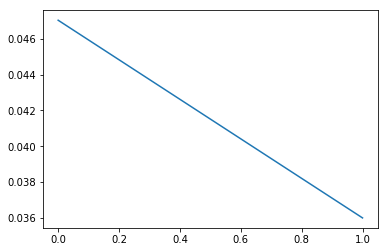

ps_car_09_cat


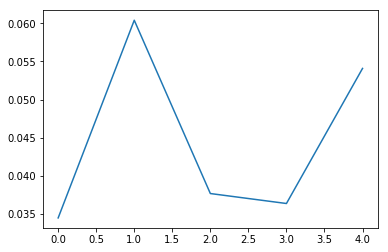

ps_car_10_cat


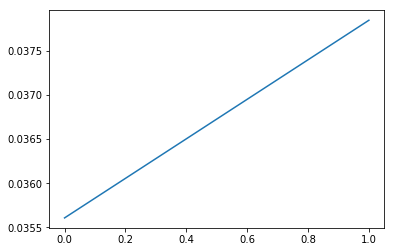

ps_car_11_cat


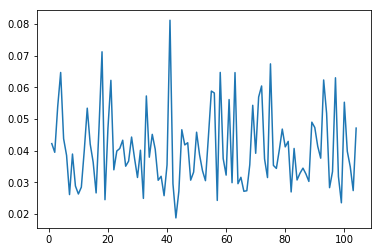

ps_car_11


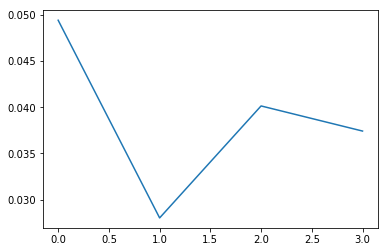

ps_car_12


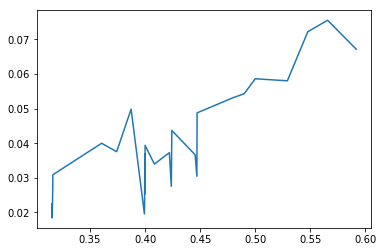

ps_car_14


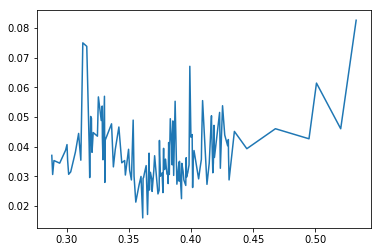

ps_car_15


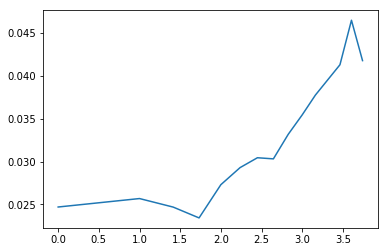

ps_calc_01


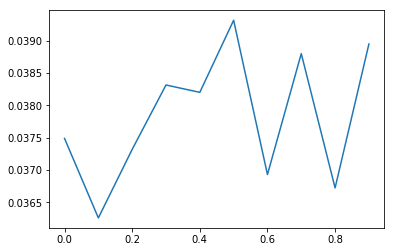

ps_calc_02


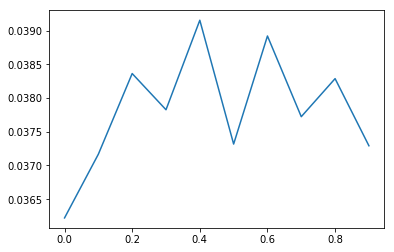

ps_calc_03


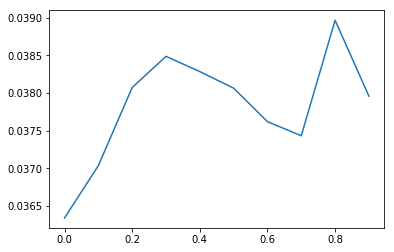

ps_calc_04


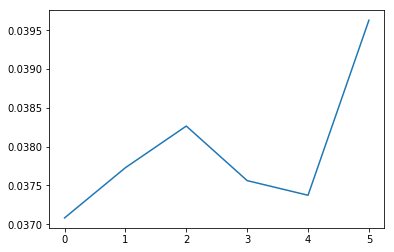

ps_calc_05


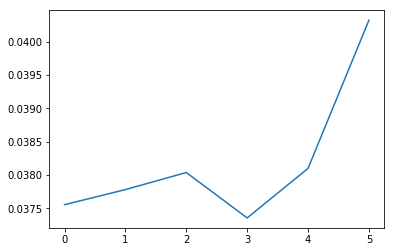

ps_calc_06


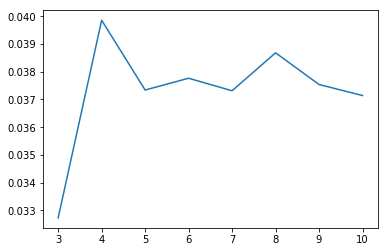

ps_calc_07


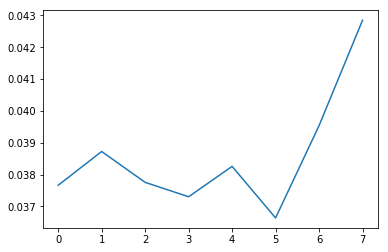

ps_calc_08


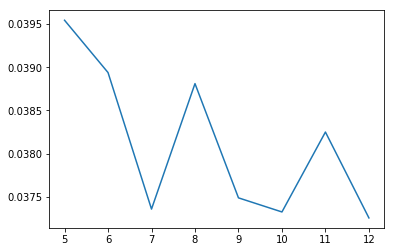

ps_calc_09


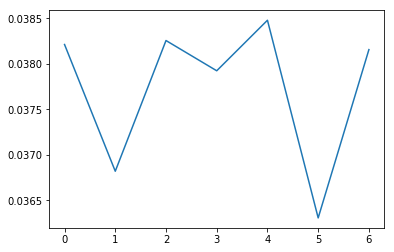

ps_calc_10


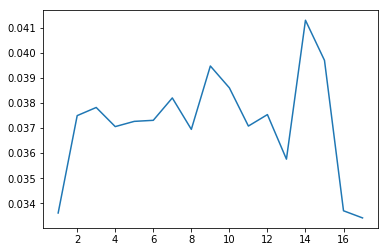

ps_calc_11


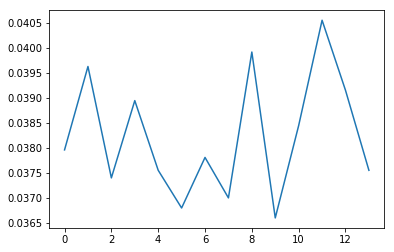

ps_calc_12


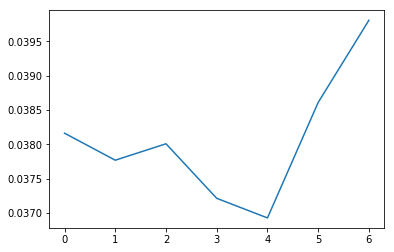

ps_calc_13


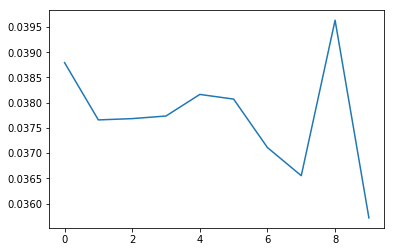

ps_calc_14


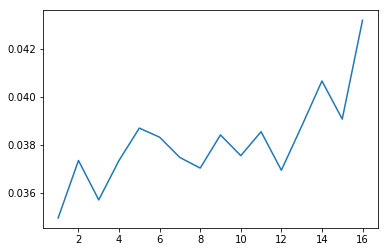

ps_calc_15_bin


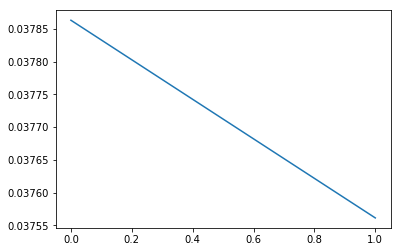

ps_calc_16_bin


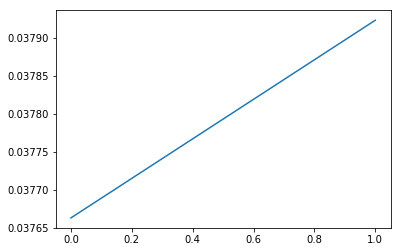

ps_calc_17_bin


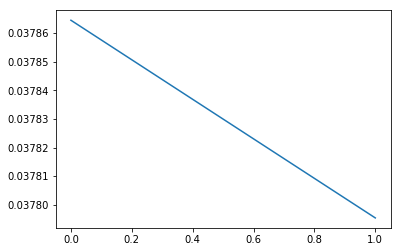

ps_calc_18_bin


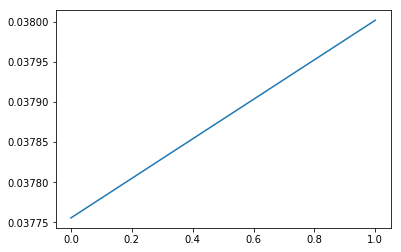

ps_calc_19_bin


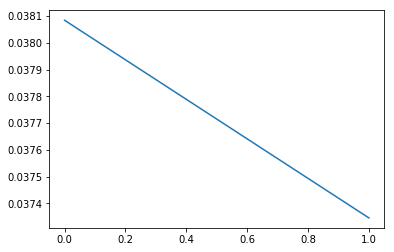

ps_calc_20_bin


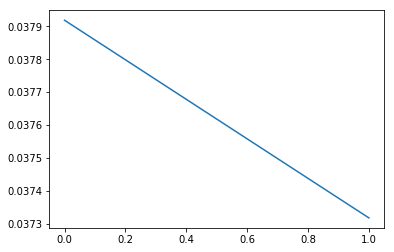

In [61]:
for ind in DATA.columns:
    if ind != 'target':
        plotsy(DATA[ind]) 

## Based on the shape of the plots' shape respective variables are transformed.

In [62]:
squares =['ps_ind_01', 'ps_car_07_cat',  'ps_calc_10']

In [63]:
for ind in squares:
    np.square(DATA[ind])

In [64]:
ex = ['ps_calc_14', 'ps_calc_12', 'ps_calc_07', 'ps_calc_05', 'ps_calc_04', 'ps_car_15', 'ps_car_14', 'ps_calc_12']

In [65]:
for ind in ex:
    np.exp(DATA[ind])

In [66]:
DATA['ps_ind_03'] = np.where(DATA['ps_ind_03'] == 0, 1,0)

In [67]:
DATA['ps_car_11'] = np.where(DATA['ps_car_11'] == 0, 1,0)

In [68]:
DATA['ps_calc_02'] = np.where(DATA['ps_calc_02'] == 0, 1,0)

In [69]:
DATA['ps_calc_06'] = np.where(DATA['ps_calc_06'] <=3, 1,0)

In [70]:
DATA['ps_ind_05_cat'] = np.where(DATA['ps_ind_05_cat'] <=3, DATA['ps_ind_05_cat'],3)


In [71]:
power3 = ['ps_car_09_cat', 'ps_calc_03', 'ps_ind_02_cat', 'ps_car_01_cat']

In [72]:
for ind in power3:
    np.power(DATA[ind], 3)

In [73]:
DATA['ps_calc_09'] = np.power(DATA['ps_calc_09'], 4) 

In [74]:
DATA['ps_calc_08'] = np.reciprocal(DATA['ps_calc_08'])

## The target variable is saved under another variable and exclueded from the dataset.

In [75]:
y = DATA['target']

In [76]:
del DATA['target']

## The data is splint into train, validation and test set (74% - 16% - 10%). 

In [77]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(DATA, y, test_size=0.1, random_state=0)

In [78]:
x_train, x_cross, y_train, y_cross = train_test_split(x_train, y_train, test_size=0.18, random_state=0)

## Logistic regression with L1 penalty is used for variable selection.

In [79]:
from sklearn.linear_model import Lasso
lassoregression = Lasso(alpha = 0.0006)

In [80]:
lassoregression.fit(x_train, y_train)
lassoregression.coef_

array([ 9.84888460e-04,  3.44533239e-04,  2.20293971e-03,  0.00000000e+00,
        6.60954517e-03, -2.60962951e-03,  3.87168188e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.03711632e-03, -1.10139398e-03,
        1.02968458e-02, -0.00000000e+00,  0.00000000e+00,  6.25319647e-03,
       -2.86876364e-03,  5.01642345e-04, -1.96711875e-03, -5.84280897e-03,
        1.47022019e-03, -0.00000000e+00,  6.65574844e-06, -1.44072950e-03,
       -3.02042775e-04,  0.00000000e+00,  0.00000000e+00,  1.52828353e-05,
        0.00000000e+00,  0.00000000e+00,  5.12294605e-03,  0.00000000e+00,
        3.64460906e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.10447294e-07,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

## On the basis of Lasso coefficients we drop irrelevant variables

In [81]:
column_indices = [i for i in range(len(lassoregression.coef_)) if lassoregression.coef_[i] != 0.]
column_indices

[0,
 1,
 2,
 4,
 5,
 6,
 14,
 15,
 16,
 19,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 31,
 34,
 36,
 45]

In [82]:
x_train = x_train[x_train.columns[column_indices]]

In [83]:
x_cross = x_cross[x_cross.columns[column_indices]]

In [84]:
x_test = x_test[x_test.columns[column_indices]]

## Logistic regression is calculated on selected variables.

In [85]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
logisticRegr.coef_

array([[ 2.41465081e-02,  2.70994579e-02,  5.88097585e-01,
         1.62289604e-01, -1.43179363e-01,  1.07625846e-01,
        -2.65009957e-02, -6.09898835e-02,  3.19451427e-01,
         1.74597937e-01, -2.04666281e-01,  8.36441116e-03,
        -5.34785229e-02, -1.93201574e-01,  4.03546550e-03,
        -1.72905525e-03, -3.61667424e-01, -3.35939842e-02,
        -8.59387061e-05,  5.56185019e-01,  7.85517971e-02,
        -1.48235797e-06]])

## The cutoff threshold is then optimized on validation set. F1-score is used as the objective.

In [87]:
predictions = logisticRegr.predict_proba(x_cross)
predictions

array([[0.98312652, 0.01687348],
       [0.97348279, 0.02651721],
       [0.97302023, 0.02697977],
       ...,
       [0.9800559 , 0.0199441 ],
       [0.96301449, 0.03698551],
       [0.97550411, 0.02449589]])

In [88]:
def optimize_treshold(treshold):
    z = predictions > treshold
    z = [int(z[x][1]) for x in range(len(z))]
    return z

In [89]:
result = []
for x in  range(1000):
    z = optimize_treshold(float(x/30000))                    
    result.append(f1_score(y_cross, z))
good_treshold = max(result)    

## For the optimal threshold we check the result on the test set.

In [93]:
predictions1 = logisticRegr.predict_proba(x_test)
z = predictions1 > good_treshold 
z = [int(z[x][1]) for x in range(len(z))]

## The final scores are presented below.

In [94]:
confusion_matrix(y_test, z)

array([[56647,   698],
       [ 2075,   102]])

In [95]:
roc_auc_score(y_score=predictions1[:,1],y_true=y_test)

0.6186012799656906

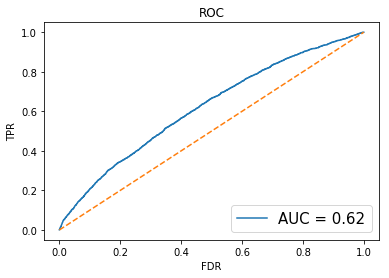

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, predictions1[:,1])

plt.plot(fpr,tpr, label = "AUC = %.2f" % roc_auc_score(y_test,predictions1[:,1]))
plt.xlabel("FDR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()